In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    ConfusionMatrixDisplay, confusion_matrix,
    classification_report
)
import tensorflow as tf

from datassist import examine_results

In [24]:
params = {'random_state': 42}

In [25]:
# load saved model TF
model = tf.keras.models.load_model('model_tf_initial_cv')

In [26]:
print(model)

In [27]:
df_heart = pd.read_csv('data/heart_failure_clinical_records_dataset.xls')

In [28]:
X = df_heart.drop(columns='DEATH_EVENT')
y = df_heart['DEATH_EVENT'].to_numpy()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=params['random_state'], stratify=y
)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [31]:
history = model.fit(X_train, y_train)

7/7 [==============================] - 1s 1ms/step - loss: 0.3581 - accuracy: 0.8616 - precision: 0.8154 - recall: 0.7361 - auc: 0.9057


In [33]:
y_pred = model.predict(scaler.transform(X_test))

3/3 [==============================] - 0s 1ms/step


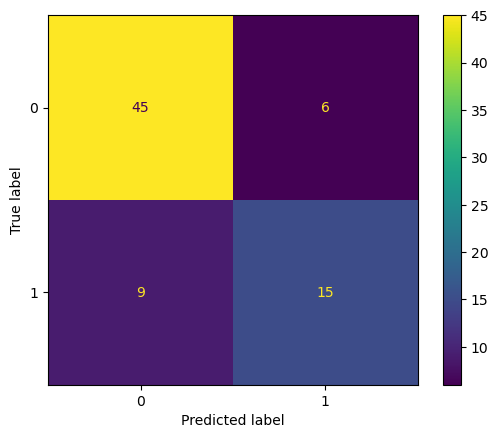

In [39]:
cm = confusion_matrix(y_test, (y_pred > 0.5))
cm_display = ConfusionMatrixDisplay(cm).plot()
# cm_display.im_.set_cmap('afmhot')

In [41]:
print(classification_report(y_test, (y_pred > 0.5)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        51
           1       0.71      0.62      0.67        24

    accuracy                           0.80        75
   macro avg       0.77      0.75      0.76        75
weighted avg       0.80      0.80      0.80        75

